## Введение в глубокое обучение
### Занятие 6. Эмбеддинги, word2vec.


##### Credits: embeddings visualization is based on the notebook by [YSDA NLP course](https://github.com/yandexdataschool/nlp_course)

#### План занятия:
0. Повторение основных моментов при работе с текстами
1. Автоэнкодеры, снижение размерности и построение информативных представлений данных
2. Построение информативных представлений слов. Обзор word2vec
3. Работа с предобученными векторными представлениями слов

### 0. Повторение основных моментов при работе с текстами
Вспомним основные отличия текста от табличных данных:
1. Текст представляет собой последовательность токенов из конечного алфавита, т.е. все элементы последовательности принимают дискретные значения.
2. Текст может быть _переменной длины_.

__Токен__ – минимальный и неделимый элемент текстовой последовательности. В зависимости от выбора эксперта, в качестве токенов могут выступать как символы, так и морфемы, слова или даже группы слов.

Очевидно, что токен - это **категориальный признак**. Нужно научиться его как-то кодировать в виде некоторой числовой последовательности, чтобы передавать в модели. Именно об этом и будет сегодняшняя лекция.

### 1. Автоэнкодеры, снижение размерности и построение информативных представлений данных

Все алгоритмы глубокого обучения, с которыми мы работаем, представляют собой некоторые математияеские модели. Они подразумевают работу с некоторым **числовым** представлением входных данных. Это представление мы называем **признаками**. Например, человека можно описать показателями его веса, роста, возраста и т.д.

При этом, размер вектора признаков может получиться очень большим. Это приводит к так называемому "*проклятию размерности*" (см. лекции по Машинному обучению). В частности, большое количество признаков сильно увеличивает размер модели, что значительно увеличивает время её обучения. К тому же, большой размер признакового пространства приводит к переобучению (т.к. при описании объектов дается слишком много избыточной информации).

Поэтому особую важность приобретают алгоритмы снижения размерности данных.

Конечно, снижение размерности приводит к некоторой потере информации.
Поэтому нужно разрабатывать алгоритмы, позволяющие сократить признаковое пространство с минимальными потерями.

На этом основан алгоритм PCA, о котором вам рассказывали на лекциях по машинному обучению.

На самом деле, Таким образом, PCA представляет собой 2 части:
1. Кодировщик (энкодер), осуществляющий **линейное** преобразование входных данных в некоторое пространство меньшей размерности.
2. Декодировщик (декодер), пытающийся восстановить исходные данные на основании сжатых признаков.

Этот алгоритм является частным случаем так назваемого **автокодировщика (автоэнкодера)**, который также состоит из энкодера и декодера. Схематично архитектура автоэнкодера приведена ниже:



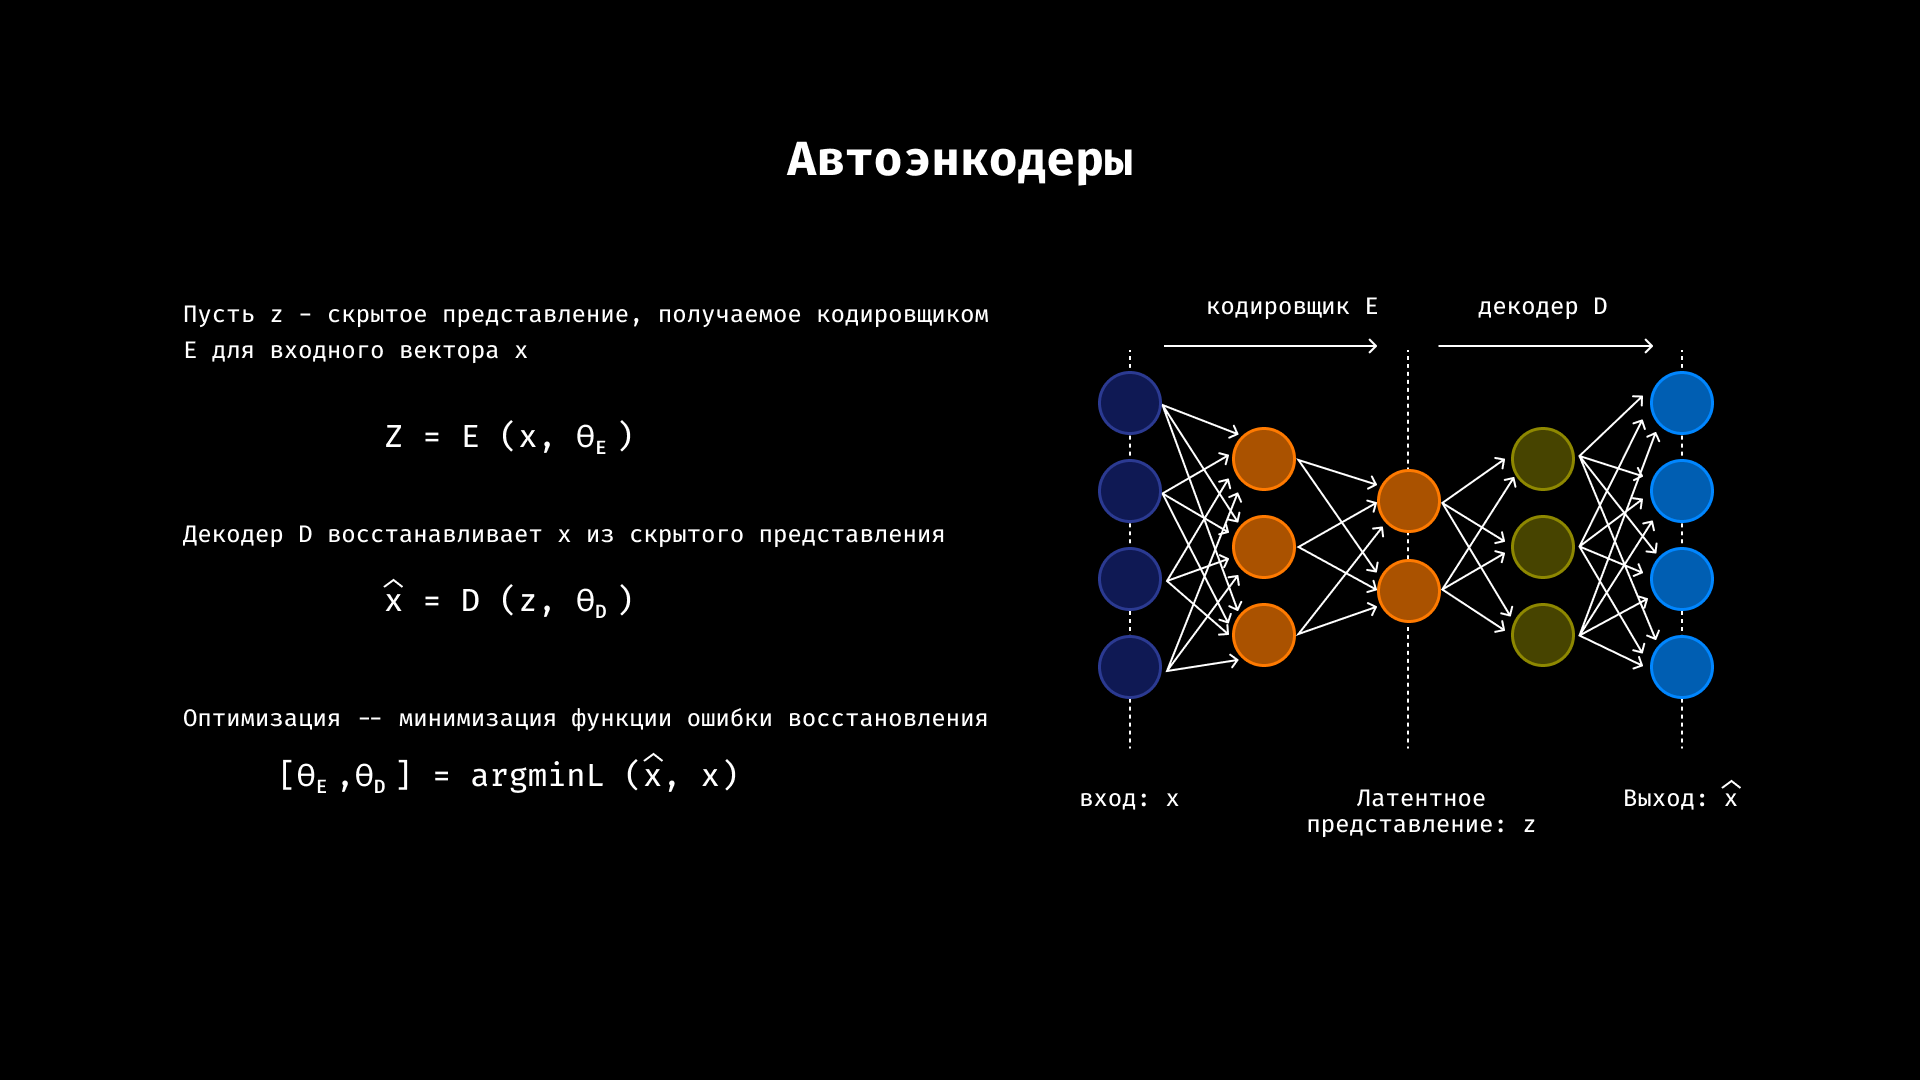

На рисунке выше вектор х подаётся на вход, вектор z - скрытое представление для вектора х

E - энкодер, D - декодер (принимает на входе z, а восстанавливает х). Параметры ищем с помощью решения задачи минимизации ошибки восстановления.

В общем случае энкодер и декодер могут быть нелинейными отображениями (в отличие от метода главных компонент).

Энкодеры нужны для построения информативного векторного представления для данных без какой-либо разметки.

На следующем слайде приведен пример применения PCA на картинках MNIST: картинку вытягиваем в вектор, сжимаем ее в вектор из 16 компонент (изначально в картинке 28х28 компонент), потом растягиваем обратно.

Сверху можно увидеть изначальные картинки, снизу - то, что удалось восстановить.

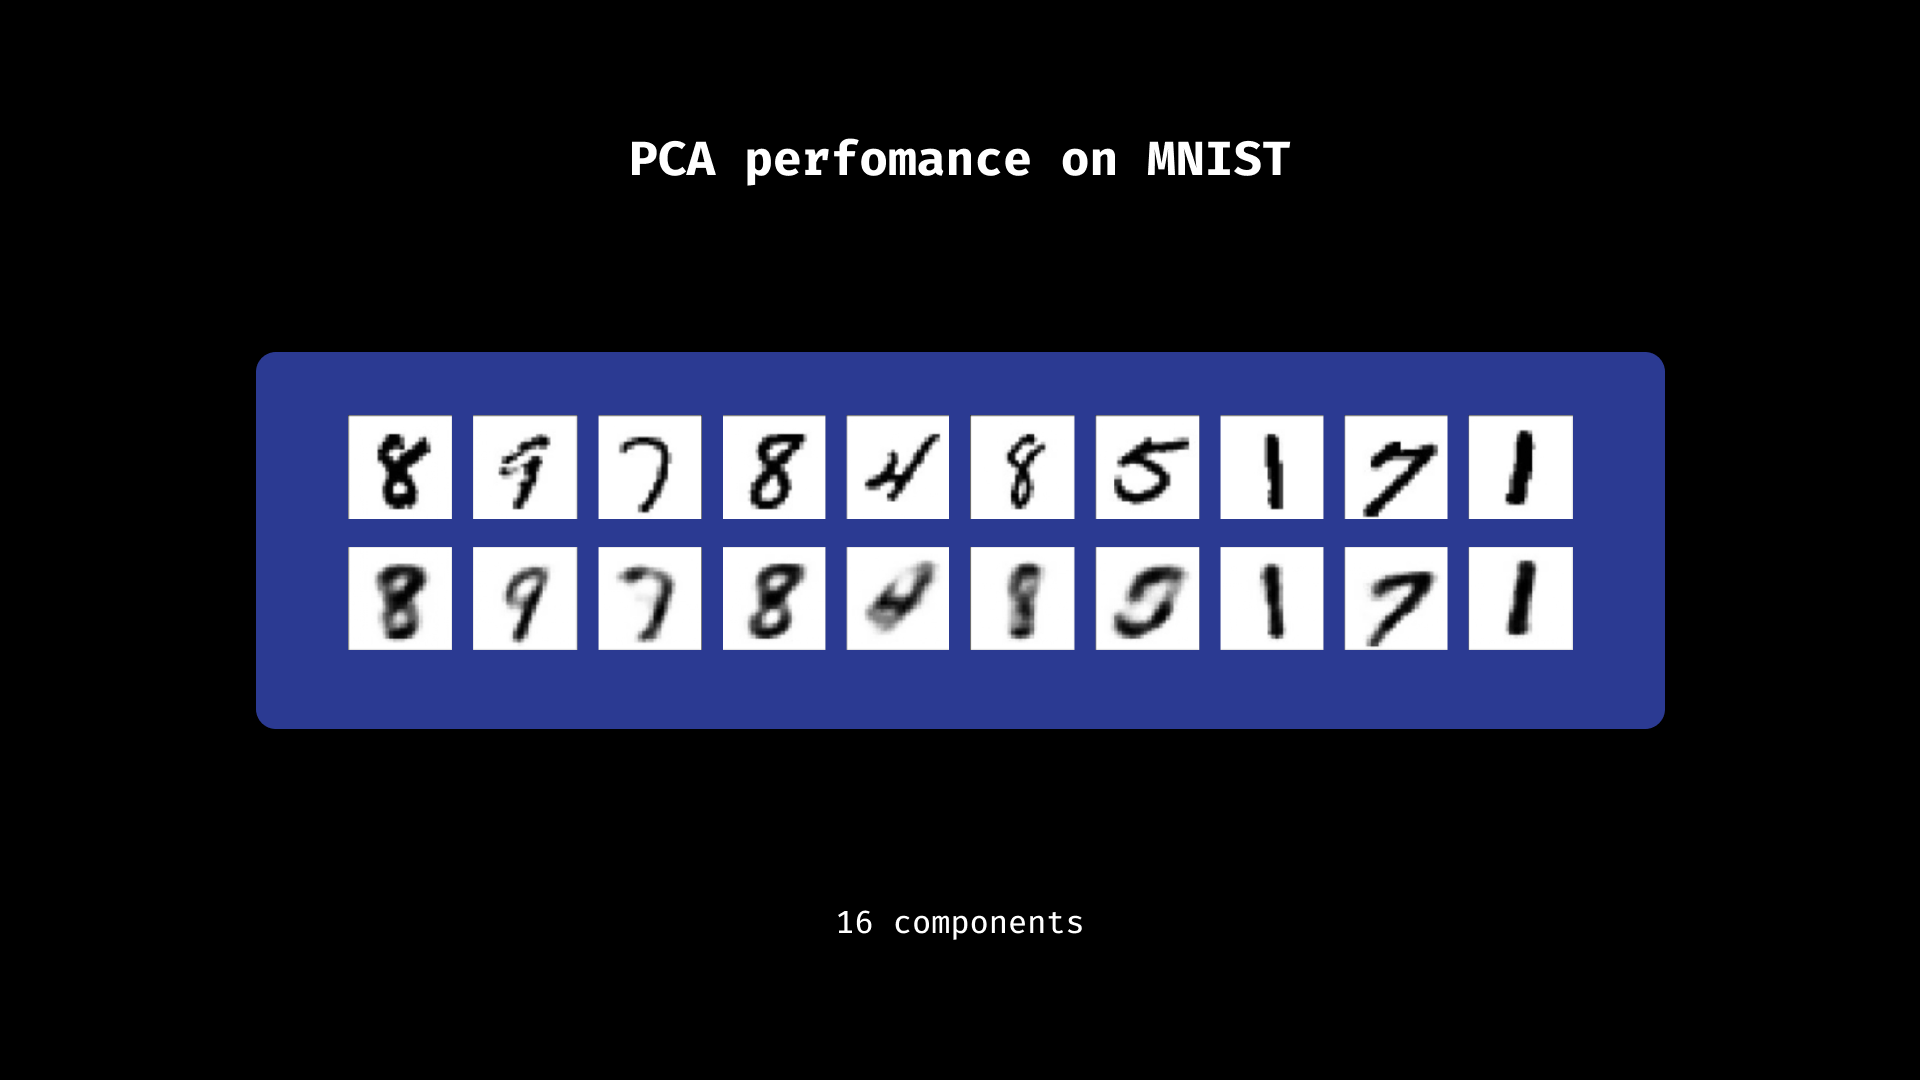

Таким образом, автоэнкодеры позволяют строить некоторые **информативные векторные представления входных данных** (*embeddings* или *эмбеддинги*). При этом, в автоэнкодерах можно использовать не только линейные преобразования. Об этом будет подробно рассказано в нашем курсе далее.

Однако, нужно выделить основной **недостаток** автоэнкодеров: *они не учитывают никакую доп. информацию о кодируемых объектах.*

Этот недостаток явно проявляется при работе с текстовыми данными, о которых мы поговорим далее.

### 2. Построение информативных векторных представлений слов. Обзор word2vec.

По факту, все модели, что мы рассматривали ранее, неявно строили *эмбеддинги*: это те самые векторные представления, которые стоят перед последним слоем нейронной сети, который, как правило, является линейным. Т.е. нейронная сеть учится отображать объекты в такое пространство, где задача линейно разрешима.

Но *как научиться строить информативные эмбеддинги для слов?*

Человек воспринимает слова знакомого языка как отдельные смысловые единицы. Затем из них складывается смысл всего предложения или текста. Машина, в отличие от человека, не имеет представления о смысле слов, она не владеет языком. Для машины слова являются лишь последовательностью некоторых символов. Чтобы использовать всю доступную информацию при работе с текстом необходимы информативные представления слов.

Существует 2 основных подхода к построению информативных представлений слов:

1. Представление текста в виде несвязанного **множества токенов**. Такие подходы подразумевают представление текста в виде **мешка слов**.

2. Представление текста в виде **последовательности токенов**.

Первый подход в своей первоначальной реализации никак не учитывает порядок токенов в тексте. Хотя этот вопрос является очень серьёзным при анализе текстовых данных.  Дело в том, язык -- очень сложная структура. При этом, в разных языках порядок слов учитывается по-разному. Иногда от порядка слов может даже зависеть целый смысл всего предложения. Сравните: "*John feeds the dog*" и "*The dog feeds John*".

Рассмотрим оба подхода более подробно.

#### Модели мешка слов. One-hot кодирование. TF-IDF.

Эти модели были рассмотрены в курсе Машинного обучения. Вкратце напомним их суть.

В данных подходах мы строим некоторый словарь токенов, встречающихся в тексте. Каждому токену по его индексу в словаре сопоставляем уникальный индекс. Тогда токену можно поставить в соответствие уникальный вектор размера словаря, описывающий этот токен.

Самый простой способ - это One-Hot Encoding, где каждому токену соответствует вектор, где единственное ненулевое значение стоит на соответствующей токену позиции. Например, слово "самолет" сопоставлено индексу 0, а размерность словаря 5. Данному токену соответствует вектор `[1, 0, 0, 0, 0]`.
Слово "обед" сопоставлено индексу 4, поэтому ему соответствует вектор `[0, 0, 0, 0, 1]`.

Получается, что One-hot представления всех слов ортогональны друг другу и не учитывают никакой дополнительной информации об употреблении слов в тексте.
Логично предположить, что при построении векторного представлении слов важно также учитывать и количество употреблений слов в тексте. Например, если в тексте чаще всего встречаются слова "акции", "облигации" и "валюта", то скорее всего в тексте речь пойдёт про инвестиции. В то же время, часто в тексте будут встречаться различные предлоги, которые встречаются в большинстве текстов и не сильно влияют на смысл текста. Поэтому, нужно как-то уменьшить влияние таких популярных слов. Для учёта этой информации можно использовать представление TF-IDF, о котором вам известно из курса Машинного обучения. Идея этого подхода аналогична кодированию One-hot, только вместо единиц в векторах слов будет указано некоторое значение 1/IDF, основанное на частоте употребления слова во всех текстах. Этот подход обычно показывает лучший результат, чем кодирование One-hot, т.к. использует дополнительную статистическую информацию. Но он менее нагляден. Поэтому, в дальнейших примерах будем рассматривать простое One-hot кодирование для токенов в документе.

#### Проблемы моделей мешка слов

При рассмотрении текста в виде множества токенов мы кодируем каждый токен в виде некоторого токена только на основании построенного словаря и, возможно, некоторой статистической информации о частоте токенов внутри входного текста.

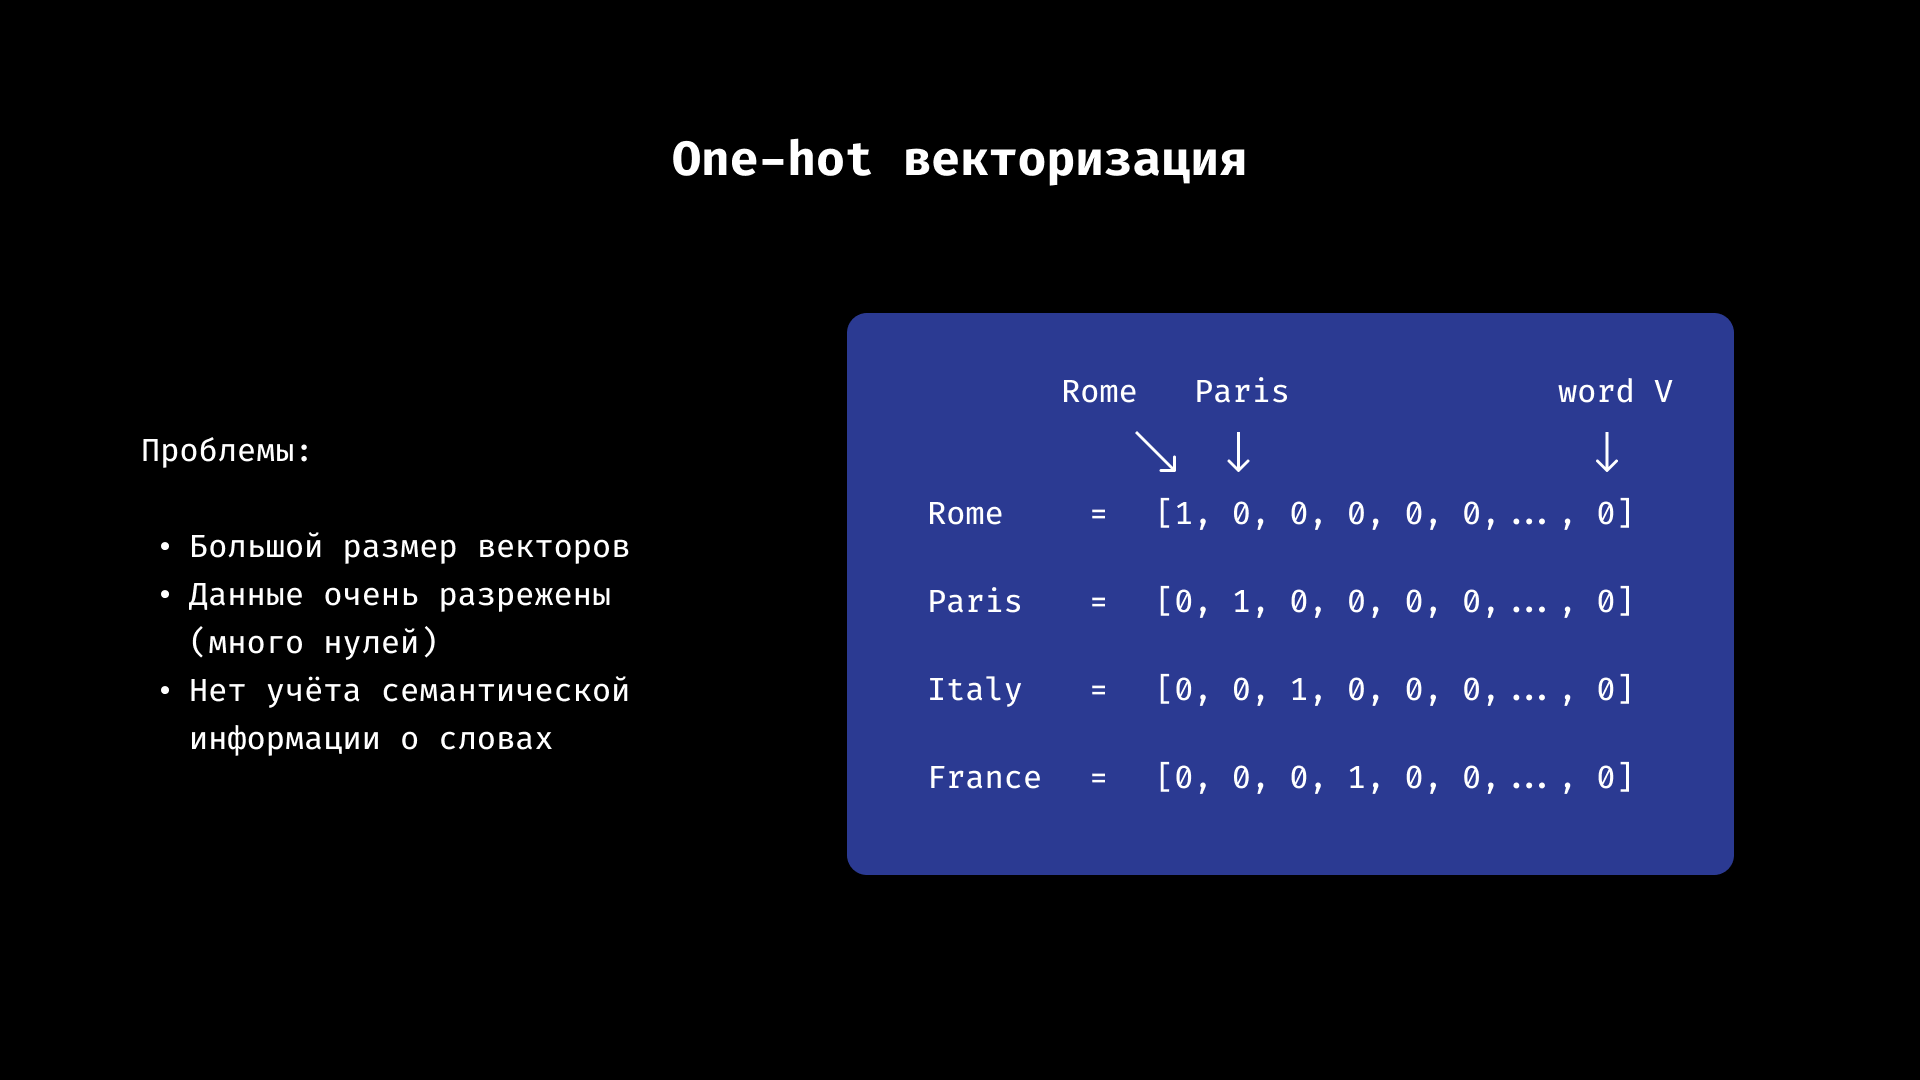

На данном рисунке мы видим пример использования one-hot кодирования и проблемы, возникающие при этом. Логично предположить, что вектора для слов Rome и Paris должны быть ближе друг к другу, т.к. это -- города. Также логично, что Rome должен быть столь же близок к Italy, как и Paris к France, т.к. эти пары слов находятся в отношении *столица-страна*. Аналогичные проблемы могут возникнуть и при построении TF-IDF либо других алгоритмов, основанных на моделях мешка слов.

Поэтому, возникает логичная мысль: при построении векторов токенов нужно каким-то образом учитывать общие знания о языке. В частности, смысловую близость слов. Учесть связи между словами и их смысл нам помогут модели последовательностей и, в частности, word2vec.

#### Построение эмбеддингов с помощью моделей последовательностей. Word2Vec.


С учётом смысла слов может помочь простая мысль (озвученная в различных формах множество раз): __слово в значительной мере определяется контекстом, в котором оно встречается__. На основании чего можно сделать простой вывод: для некоторых слов более характерен один контекст, а для других – другой. Именно на этой идее и построен word2vec (как и многие другие эмбеддинги, основанные на моделях последовательностей:

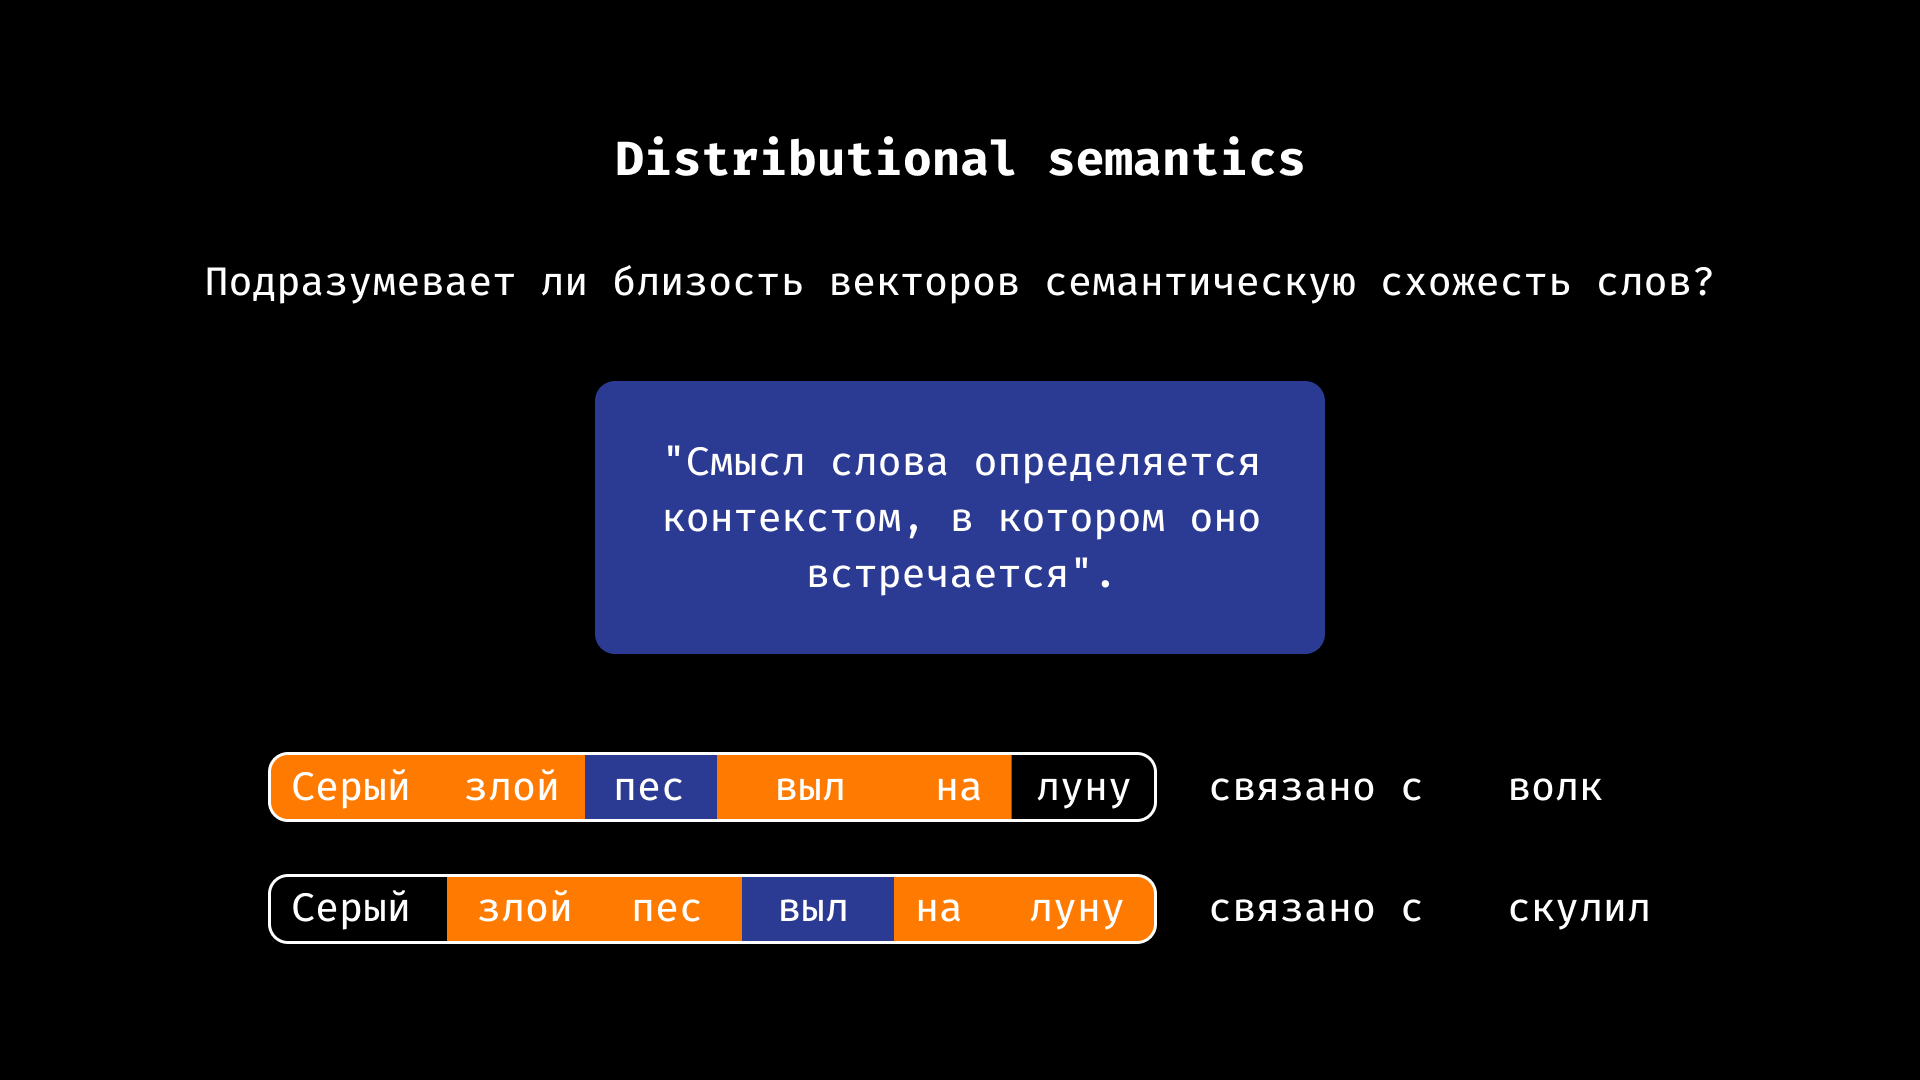

По слову можно научиться предсказывать контекст, в котором оно встречается. Конечно, результат не будет идеально точным. Но если модель делает предсказания лучше, чем случайным образом, значит, она улавливает какую-то связь. И тогда внутреннее представление модели для каждого слова и может использоваться в качестве искомого векторного представления, причем и в других задачах.


Формулировка гипотезы выше (слово значительно связано с контекстом) позволяет использовать в качестве обучающей выборки всё множество текстов для выбранного языка. Собрание сочинений классиков, статьи в энциклопедии, новостные заметки – всё это становится обучающей выборкой. И векторные представления, полученные на основе данных текстов позволяют улавливать связь между этими словами.

Рассмотрим пример складывания и вычитания слов на уровне смыслов.

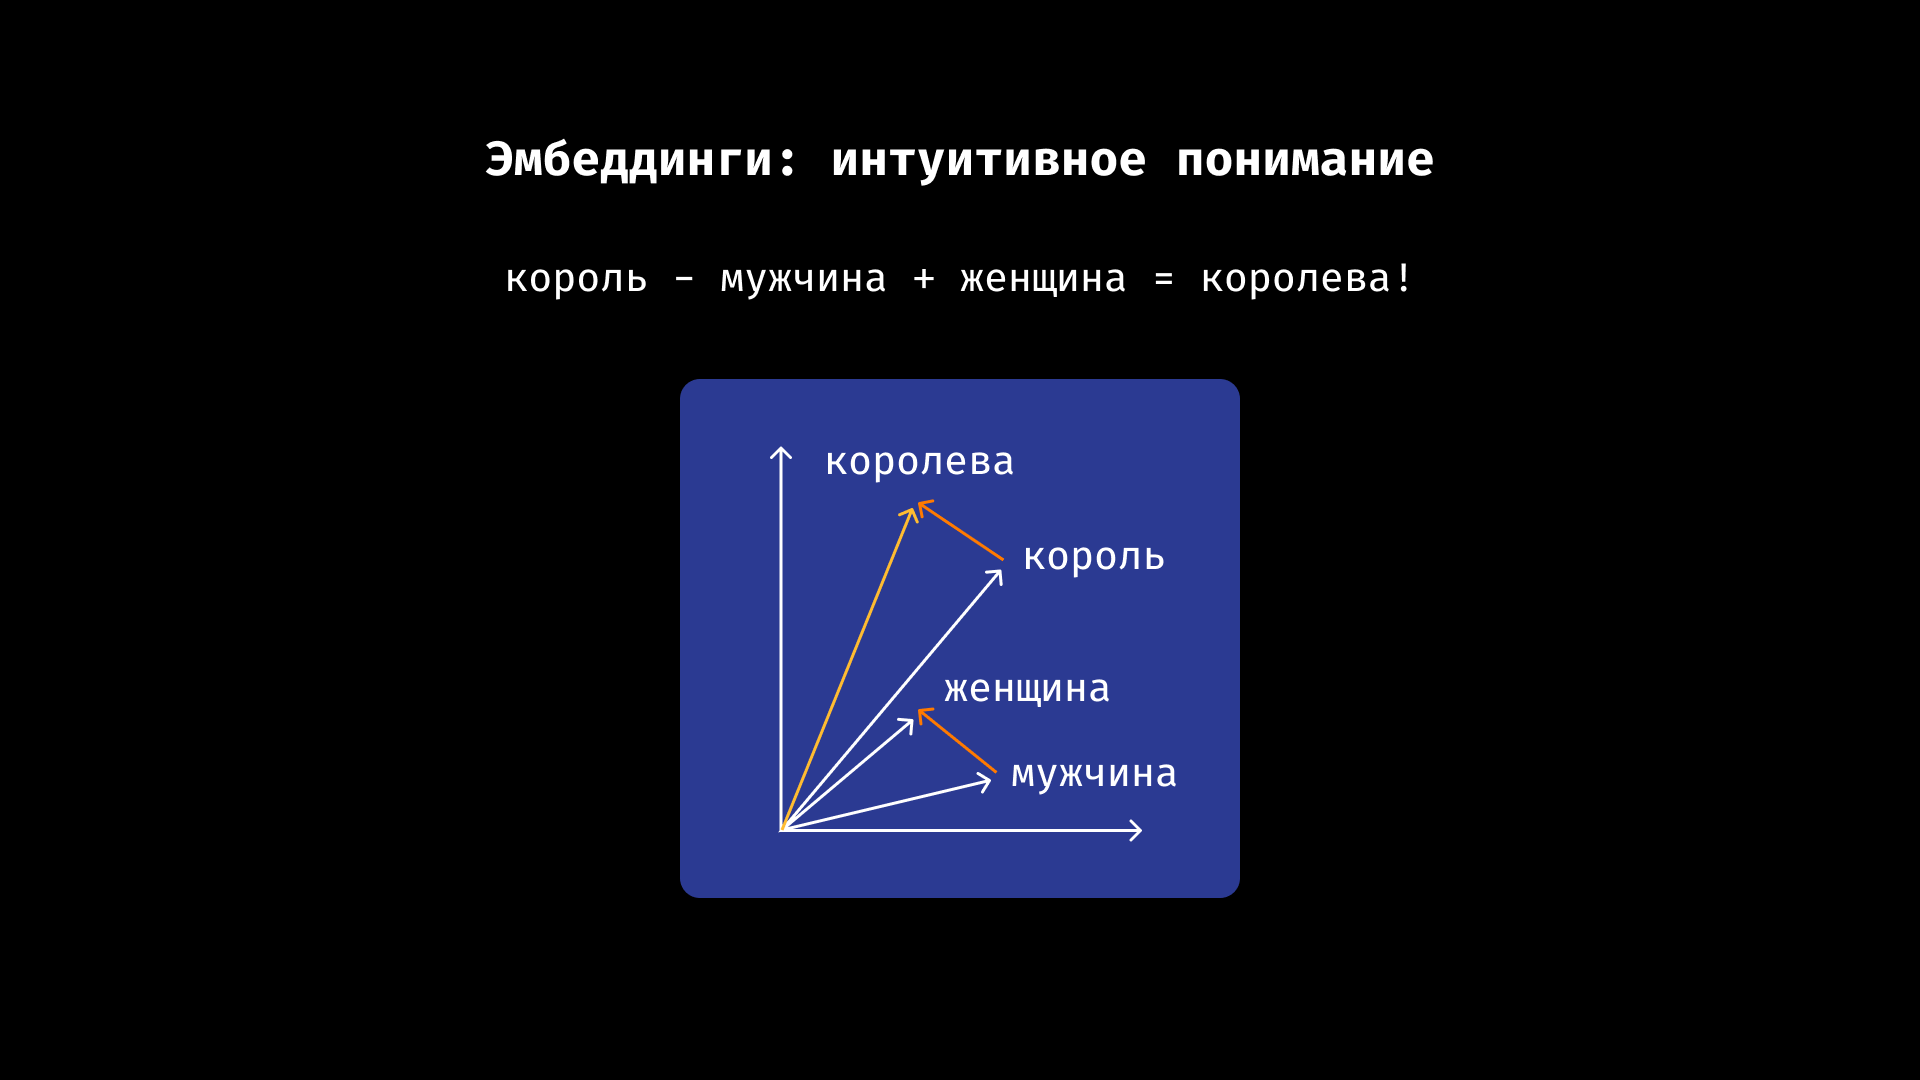

В данном случае используется косинусная мера близости векторов слов, известная вам из курса Машинного обучения. Максимизируя косинус между векторными представлениями слов, мы пытаемся уменьшить угол между похожими словами (вспомните: чем больше косинус угла, тем меньше этот угол):

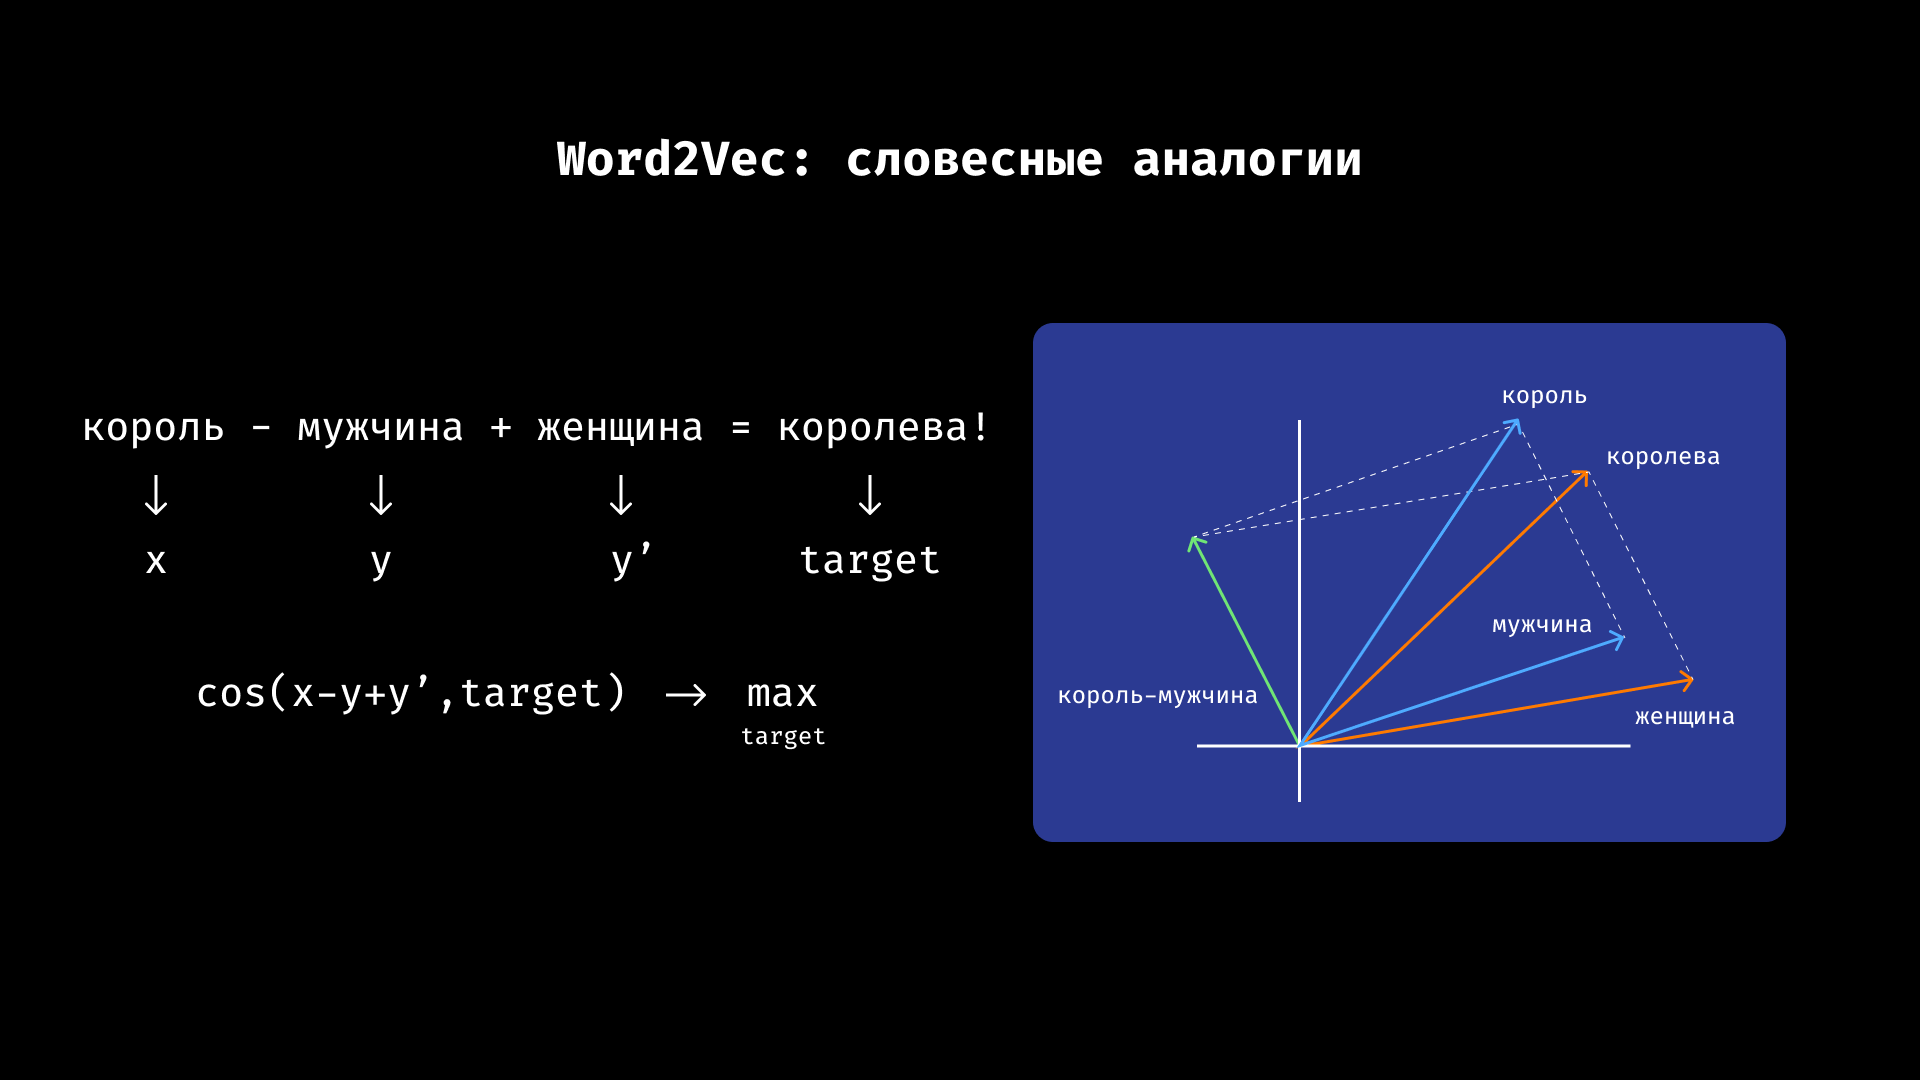

Отображение слова в вектор предложил Томас Миколов в 2013.

На рисунке можно увидеть, что слова с похожим смыслом отстоят на примерно одинаковом расстоянии друг от друга.

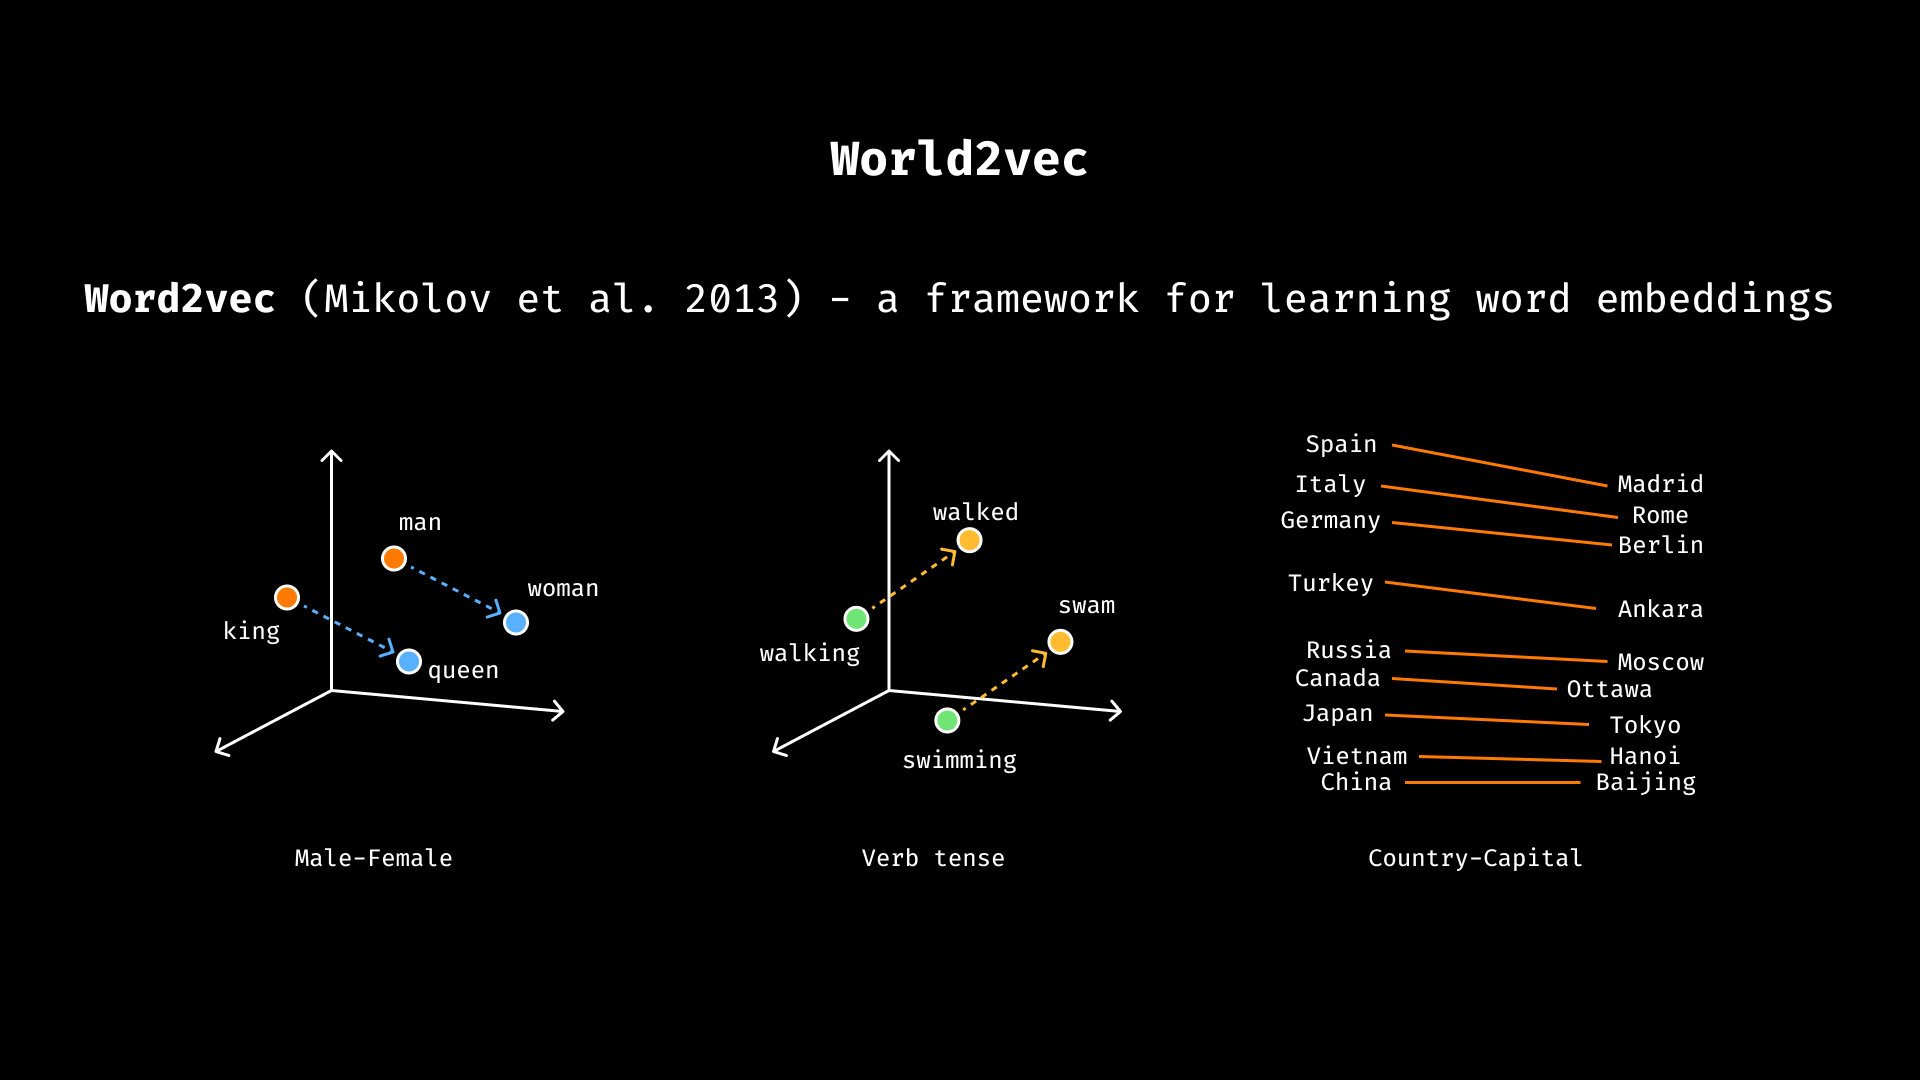

Как же удалось найти такое отображение и его построить?

Идея: *из изначального векторного представления слова (one-hot вектора) предсказывать слова, которые могут оказаться с ним в контексте*.

Существуют слова-синонимы, которые встречаются в одном и том же контексте. Тогда таргеты у них будут примерно одинаковые, а отображение из латентного пространства в таргет фиксированное. Значит у них схожи промежуточные представления, которые мы хотим выучить. А это именно то, что нужно, ведь мы учимся представлять слова в таком виде, что их промежуточные представления зависят от смысла.

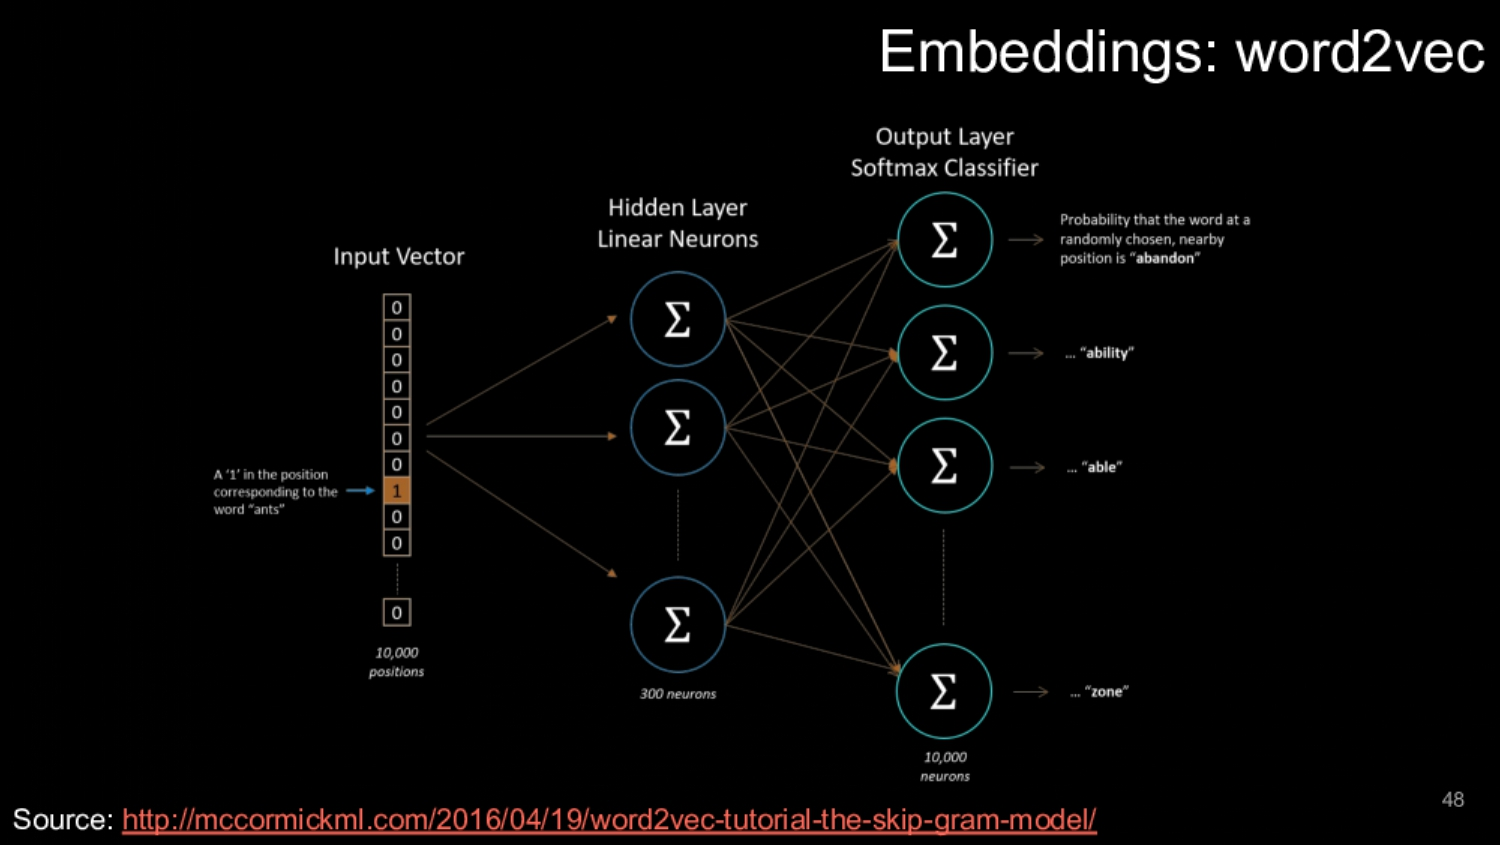

Посмотрим, как это работает на практике.

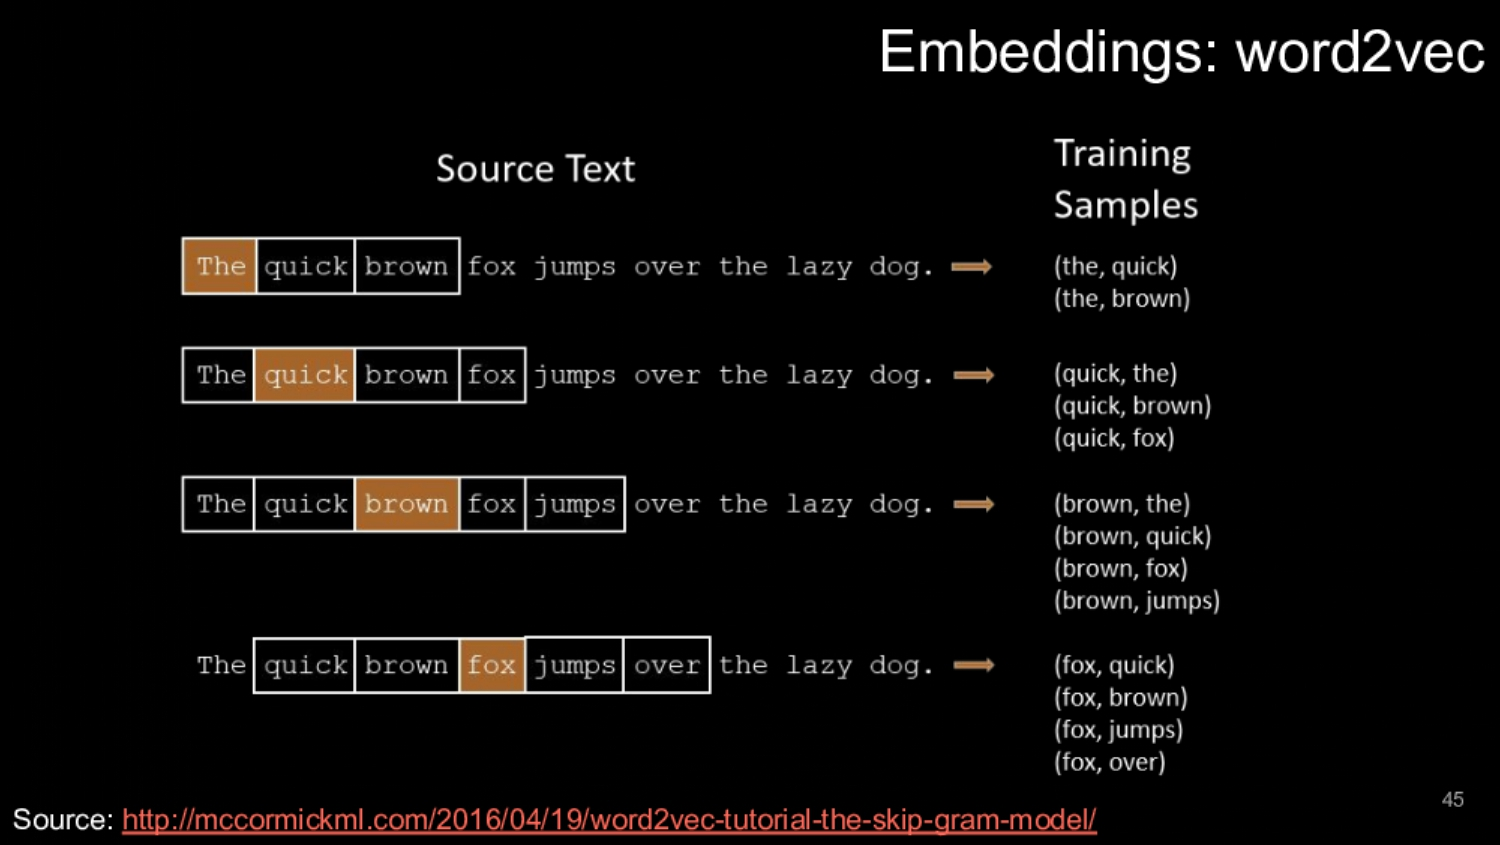

Фиксируется некоторое число $k$. Для каждого слова выбираются те слова, которые находятся на расстоянии не более $k$. Эти слова считаются "локальным контекстом" центрального слова. Теперь у нас есть (слово, контекст), которые могут использоваться как обучающая выборка для задачи классификации (т.к. слов в словаре конечное число). Это и позволяет выучить информативные векторные представления для слов – модель должна самостоятельно выучить, в каких контекстах могут встречаться какие-то слова, т.е. в каком-то смысле научиться их **понимать**.

Примеры из оригинальных статей. GloVe - еще один способ строить векторы. Мы не будем углубляться в его реализацию.

Здесь видим, что снизу мальчики, сверху девочки. И они примерно одинаково отстоят друг от друга.

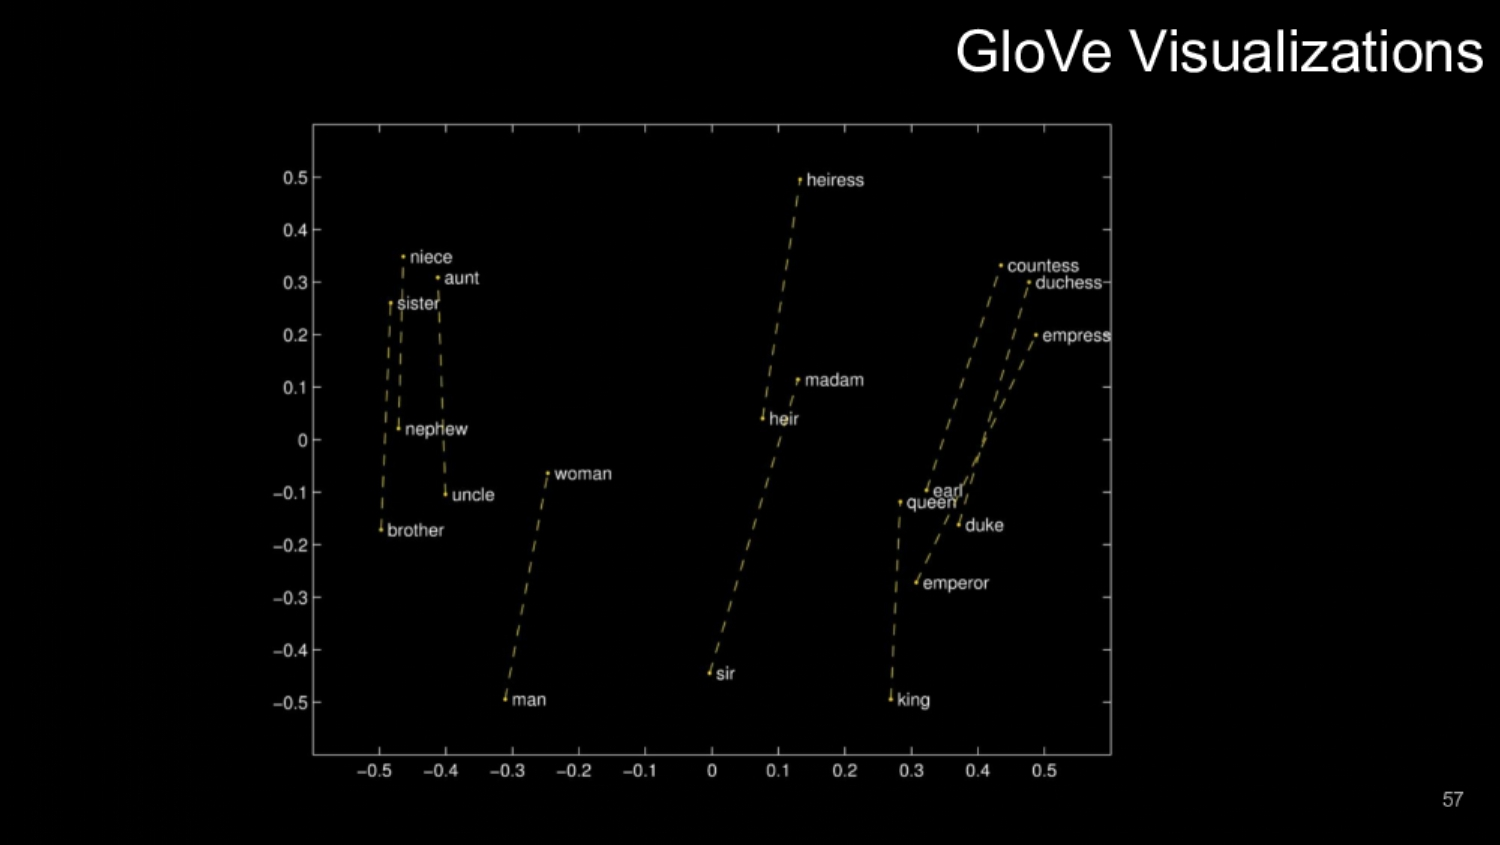

На следующем примере: слева - название компании, справа - имя ген.директора.

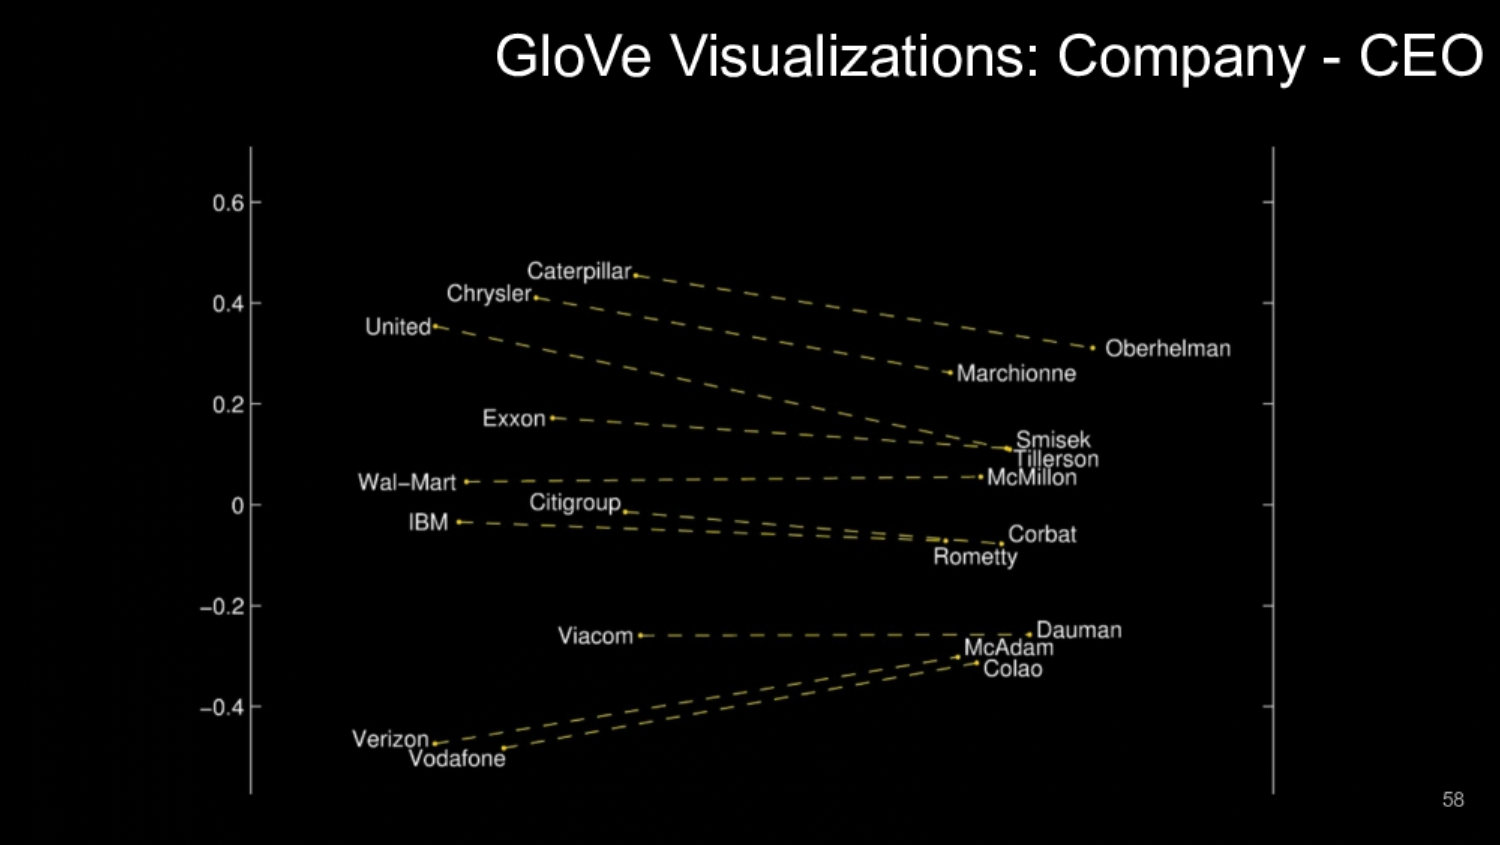

#### **Визуализация.**

Здесь можно увидеть, что слова, отвечающие за разные смысловые элементы, в общей массе слов распределились близко друг к другу, т.к. похожие слова имеют похожие векторы.

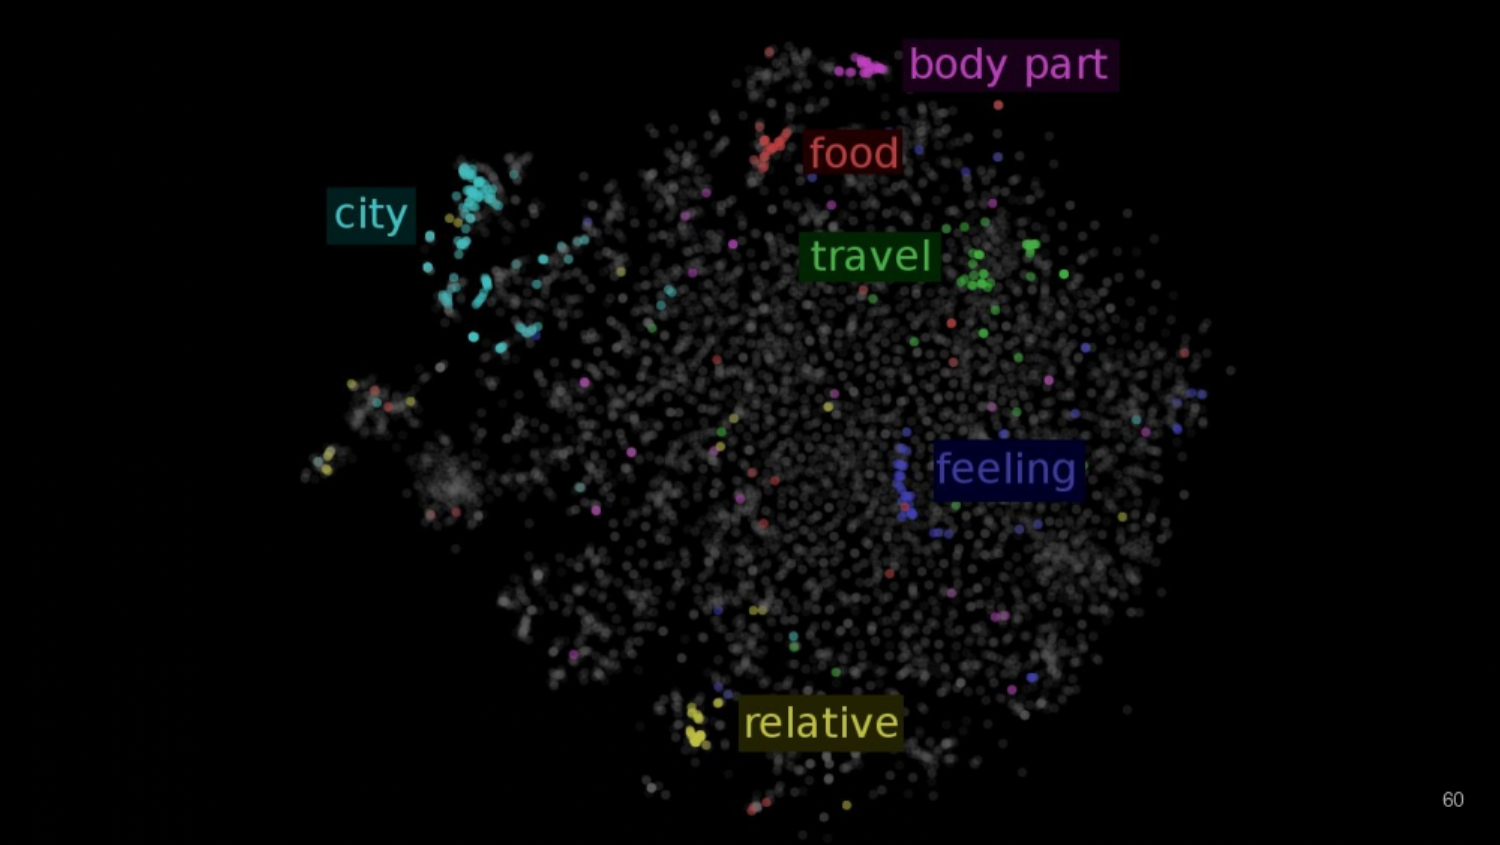

In [ ]:
! pip install --upgrade nltk gensim bokeh umap-learn                              # установим нужные библиотеки, визуализаторы

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#import itertools                                                                  # встроенная библиотека итераторов
import string

import numpy as np
import umap                                                                       # библиотека, позволяющая строить маломерные представления данных
                                                                                  # или же снижать размерности, сохраняет свойство локальности
from nltk.tokenize import WordPunctTokenizer

from matplotlib import pyplot as plt

from IPython.display import clear_output

In [ ]:
# download the data:
#!wget https://www.dropbox.com/s/obaitrix9jyu84r/quora.txt?dl=1 -O ./quora.txt -nc

!wget https://raw.githubusercontent.com/MSUcourses/Data-Analysis-with-Python/main/Deep%20Learning/Files/quora.txt -O ./quora.txt -nc
# alternative download link: https://yadi.sk/i/BPQrUu1NaTduEw

--2023-03-29 08:59:00--  https://raw.githubusercontent.com/MSUcourses/Data-Analysis-with-Python/main/Deep%20Learning/Files/quora.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33813915 (32M) [text/plain]
Saving to: ‘./quora.txt’

./quora.txt         100%[===================>]  32.25M   176MB/s    in 0.2s    

2023-03-29 08:59:01 (176 MB/s) - ‘./quora.txt’ saved [33813915/33813915]



In [ ]:
data = list(open("./quora.txt", encoding="utf-8"))                                # видим вопрос №55 из quora
data[55]

'What are all the pros and cons of having dual citizenship?\n'

Произведем токенизацию и базовую предобработку:

In [ ]:
tokenizer = WordPunctTokenizer()                                                  # из NLTK (Natural Language Toolkit) для работы с
                                                                                  # естественным языком "дергаем" WordPunctTokenizer(), который
                                                                                  # бьет предложение на слова и знаки препинания
print(tokenizer.tokenize(data[55]))
data_tok = [tokenizer.tokenize(x.lower()) for x in data]                          # приведем все к нижнему регистру

['What', 'are', 'all', 'the', 'pros', 'and', 'cons', 'of', 'having', 'dual', 'citizenship', '?']


In [ ]:
len(data)                                                                         # видим, что в данных 537272 предложения

537272

Для начала, обучим word2vec на доступном наборе данных. Строить для этого модель вручную не понадобится, она уже доступна в `gensim`.

In [ ]:
from gensim.models import Word2Vec
model_obj = Word2Vec(data_tok,
                 vector_size=32,                                                  # для каждого слова строится 32-мерный вектор
                 min_count=5,                                                     # рассматриваем только слова, встречающиеся как минимум 5 раз в тексте
                 window=5)                                                        # определяем контекст окном в 5 слов около слова-таргета
model = model_obj.wv                                                              # сохраняем соответствие слов и их векторов в переменную model

Теперь нам доступны векторы для любого слова из словаря:

In [ ]:
model.get_vector('cat')                                                           # рассмотрим вектор для слова 'cat'

array([-3.5789406e+00,  1.2688192e+00, -9.5322984e-01,  2.1143728e-01,
       -1.2934026e+00,  2.9630059e-01, -7.4758157e-02, -5.7157069e-01,
       -2.5290358e-01,  4.0184064e+00,  1.1084865e+00, -2.1202178e+00,
       -1.9233067e+00,  3.3923309e+00,  2.8593633e+00, -2.0071852e+00,
       -3.5907137e+00, -6.6933990e-04, -1.7500341e+00, -1.2897893e+00,
        1.4527791e+00,  1.0206822e+00, -2.3683109e+00,  1.1299968e+00,
       -4.2878816e-01,  1.1017236e-01, -1.8012751e+00, -1.1925224e-01,
       -2.4314821e+00,  2.5915771e+00,  1.3681360e+00, -3.8487341e-02],
      dtype=float32)

Так как слова представлены векторами, теперь можно вычислить расстояние (или некоторую меру схожести) между ними. Например, можно оценить, какие слова наиболее близки к заданному.

In [ ]:
model.most_similar('parent')                                                      # most_similar() - метод, который берет слово, находит для него
                                                                                  # вектор, ищет ближайшие к нему векторы по какой-то мере близости
                                                                                  # тут используется косинусная мера близости

[('child', 0.8991146683692932),
 ('woman', 0.8563902378082275),
 ('kid', 0.843869686126709),
 ('man', 0.8287737965583801),
 ('person', 0.8223336935043335),
 ('partner', 0.8152374625205994),
 ('psychopath', 0.8103804588317871),
 ('mother', 0.8057411909103394),
 ('baby', 0.8042587041854858),
 ('narcissist', 0.8038986921310425)]

### 3. Работа с предобученными векторными представлениями слов

Для получения качественных эмбеддингов стоит использовать большие наборы данных. Также бывает полезным использовать данные из определенной предметной области. Конечно, обучение занимает значительное время, поэтому зачастую используются предобученные эмбеддинги для слов.

Загрузим предобученные эмбеддинги небольшой размерности (25). Они были обучены на данных из Twitter.

In [ ]:
import gensim.downloader as api
model = api.load('glove-twitter-25')                                              # glove - еще один тип векторов (global vectors)

[=================================================-] 99.3% 104.1/104.8MB downloaded


In [ ]:
model.most_similar(positive=["лето"]) # positive=["лето"]                         # раскомментировав, можно посмотреть слова, близкие к слову "лето"

[('утро', 0.8916537761688232),
 ('весна', 0.878777265548706),
 ('зима', 0.8693447113037109),
 ('скоро', 0.8552830219268799),
 ('солнце', 0.8396058082580566),
 ('ночь', 0.8204128742218018),
 ('надеюсь', 0.8200833797454834),
 ('воскресенье', 0.8176007270812988),
 ('летом', 0.8077778816223145),
 ('солнышко', 0.8064454793930054)]

#### Визуализация векторных представлений слов

В данный момент каждое слово представлено вектором размерности 25. Для визуализации слов нам понадобится техника снижения размерности. Для простоты можно воспользоваться методом главных компонент, PCA, который также может рассматриваться как линейный автоэнкодер:

$$\|(X W) \hat{W} - X\|^2_2 \to_{W, \hat{W}} \min,$$
где $W$ и $\hat{W}$ – обучаемые параметры.

$X W$ отображает все в маломерное пространство, $\hat{W}$ восстанавливает в исходное пространство.

Здесь мы пытаемся минимизировать ошибку восстановления.

In [ ]:
model.sort_by_descending_frequency()                                              # выберем наиболее часто встречающиеся слова

In [ ]:
len(model.key_to_index.keys())

1193514

In [ ]:
words = list(model.key_to_index.keys())[:1000]                                    # берем первую тысячу слов и для нее построим векторы

print(words[::100])

word_vectors = np.asarray([model[x] for x in words])

['<user>', '_', 'please', 'apa', 'justin', 'text', 'hari', 'playing', 'once', 'sei']


In [ ]:
# построим для всего этого какое-то (а именно двумерное) маломерное представление
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca = PCA(2)                                                                      # взяли PCA (метод главных компонент), линейно снизили размерность до двух, затем
                                                                                  # вернулись в исходное пространство с потерей части информации
scaler = StandardScaler()

word_vectors_pca = scaler.fit_transform(word_vectors)                             # прежде отнормируем данные
word_vectors_pca = pca.fit_transform(word_vectors_pca)

Для визуализации обратимся к замечательной библиотеке `bokeh`. Графики являются интерактивными.

In [ ]:
import bokeh.models as bm, bokeh.plotting as pl
from bokeh.io import output_notebook
output_notebook()

def draw_vectors(x, y, radius=10, alpha=0.25, color='blue',
                 width=600, height=400, show=True, **kwargs):
    """ draws an interactive plot for data points with auxilirary info on hover """
    if isinstance(color, str): color = [color] * len(x)
    data_source = bm.ColumnDataSource({ 'x' : x,
                                       'y' : y,
                                       'color': color, **kwargs })                # ColumnDataSource все по колонкам
                                                                                  # x, y, цвета поданы извне

    fig = pl.figure(active_scroll='wheel_zoom', width=width, height=height)       # рисуем фигуру, которая динамически будет перешкалироваться
    fig.scatter('x', 'y', size=radius, color='color',
                alpha=alpha, source=data_source)                                  # рисуем точками

    fig.add_tools(bm.HoverTool(tooltips=[(key, "@" + key) for key in kwargs.keys()]))
    if show: pl.show(fig)
    return fig

In [ ]:
draw_vectors(word_vectors_pca[:, 0], word_vectors_pca[:, 1], token=words)         # можно увидеть, что слова разбились по языкам на несколько кучек

figure(id='p1004', ...)

Как видим, образовалось несколько кластеров ("кучек", или же скоплений). Каждая из них обладает некоторой отличительной чертой: смыслом входящих в нее слов, языком или каким-либо еще общим свойством. График интерактивный, его полезно проанализировать самостоятельно.

#### Снижение размерности с помощью UMAP
Метод главных компонент – замечательная техника, но он позволяет улавливать лишь линейные зависимости в данных. Обратимся к технике [UMAP](https://habr.com/ru/company/newprolab/blog/350584/), которая учитывает соседей заданных точек. По ссылке выше можно прочитать развернутое описание данной техники.

In [ ]:
embedding = umap.UMAP(n_neighbors=5).fit_transform(word_vectors)                  # будем смотреть на 5 соседей
                                                                                  # fit_transform(word_vectors) - все исходные векторы преобразовали

In [ ]:
draw_vectors(embedding[:, 0], embedding[:, 1], token=words)                       # теперь получились гораздо более ярко выраженные кучки,
                                                                                  # которые между собой не связаны
                                                                                  # появился русский язык

figure(id='p1154', ...)

Как можно видеть, слова образуют гораздо более четкие группы, различимые невооруженным глазом. График - интерактивный, при наведении курсора на точку указывается, какому слову она соответствует.
Можно видеть, что слова различных языков стоят рядом. Для английского языка (его слов больше всего в наших данных) видно несколько подгрупп.

#### Визуализация фраз

В завершение построим векторные представления не только слов, но и целых фраз. Для простоты воспользуемся подходом, аналогичным мешку слов (BoW): мешком эмбеддингов. Каждую фразу представим в виде усредненного эмбеддинга всех входящих в нее слов.

In [ ]:
def get_phrase_embedding(phrase):                                                 # на вход приходит фраза - последовательность токенов
                                                                                  # переменной длины
    """
    Convert phrase to a vector by aggregating it's word embeddings.
    """
    vector = np.zeros([model.vector_size], dtype='float32')                       # изначально имеем вектор из нулей
    phrase_tokenized = tokenizer.tokenize(phrase.lower())                         # теперь для каждой фразы прогоняем токенизатор
    phrase_vectors = [model[x] for x in phrase_tokenized if model.has_index_for(x)] # для каждого слова получаем вектор, укладываем их вместе

    if len(phrase_vectors) != 0:
        vector = np.mean(phrase_vectors, axis=0)                                  # затем либо усредняем, именно операция усреднения позволяет нам
                                                                                  # избавиться от переменной длины текста (получаем из большой длины
                                                                                  # фиксированный вектор),
    return vector                                                                 # либо возвращаем вектор из нулей, если ничего нет

In [ ]:
data[402687]

'What gift should I give to my girlfriend on her birthday?\n'

In [ ]:
get_phrase_embedding(data[402687])

array([-0.18204999,  0.30953574,  0.20861094,  0.07982156, -0.22565515,
       -0.33001748,  1.2495784 ,  0.13134292, -0.33788875,  0.06196944,
       -0.231793  ,  0.09389219, -4.9685497 , -0.23611419, -0.32609668,
       -0.092073  ,  0.4407505 , -0.75413746, -0.5389092 , -0.184752  ,
        0.07867809,  0.20018655, -0.16202375,  0.30375698, -0.41255665],
      dtype=float32)

In [ ]:
vector = get_phrase_embedding("Hello, today we speak about word vectors!")        # можем получить вектор абсолютно для любого предложения
                                                                                  # т.е. не только для данных из обучающей выборки
                                                                                  # т.к. векторы уже были предобучены

In [ ]:
vector

array([ 0.30748555, -0.05400768, -0.18464424, -0.13607563, -0.23507245,
       -0.04939345,  1.1183112 ,  0.05371887, -0.32848334,  0.19103   ,
       -0.21656999,  0.19023776, -3.84866   , -0.257967  ,  0.21277945,
        0.00940701,  0.19321555, -0.32837075, -0.29023   , -0.09518776,
       -0.1398064 , -0.06628689, -0.53203714,  0.3393022 ,  0.14804935],
      dtype=float32)

Дополнительно, вы можете попробовать сделать следующее:
* Воспользоваться t-SNE вместо UMAP (требует гораздо больше времени на больших выборках)
* Визуализировать весь набор данных, а не только его часть
* Воспользоваться другими эмбеддингами из `gensim` "model zoo": `gensim.downloader.info()`
* Рассмотреть принципы работы [FastText](https://github.com/facebookresearch/fastText), которые несколько отличаются от word2vec

#### Выводы:
* Использование векторных представлений слов, обученных на значительных объемах текстовых данных, позволяет переносить эти знания в другие задачи.
* При построении некоторого решения для работы с текстами полезно использовать предобученные эмбеддинги. Конечно, их можно и дообучить под задачу.
* Построение эмбеддингов возможно не только для слов, но и для других объектов (текстов, изображений, графов и др.).